In [36]:
import sys
# Install the ultralytics library for YOLO models, opencv-python for image processing, and matplotlib for plotting.
# The `!pip install` command is used to execute shell commands within the Colab environment.
!pip install ultralytics opencv-python matplotlib

In [31]:
from ultralytics import YOLO # Import the YOLO class from the ultralytics library to work with YOLO models.
import cv2 # Import the OpenCV library for image processing functionalities.
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module for plotting and displaying images.
from google.colab import files # Import the 'files' module from google.colab to handle file uploads in the Colab environment.

In [32]:
model = YOLO("yolov8n-pose.pt") # Initialize a YOLO model instance and load the pre-trained 'yolov8n-pose.pt' weights for pose estimation.

In [33]:
uploaded = files.upload() # Prompt the user to upload a file and store the uploaded file objects in the 'uploaded' dictionary.
image_path = list(uploaded.keys())[0] # Extract the filename (path) of the first uploaded file from the dictionary keys.

Saving man standing.jpg to man standing (5).jpg


In [34]:
KEYPOINT_NAMES = [ # Define a list of strings representing the names of the 17 keypoints for human pose estimation.
    "Nose", "Left Eye", "Right Eye", "Left Ear", "Right Ear", # Keypoints for the head and face.
    "Left Shoulder", "Right Shoulder", # Keypoints for the shoulders.
    "Left Elbow", "Right Elbow", # Keypoints for the elbows.
    "Left Wrist", "Right Wrist", # Keypoints for the wrists.
    "Left Hip", "Right Hip", # Keypoints for the hips.
    "Left Knee", "Right Knee", # Keypoints for the knees.
    "Left Ankle", "Right Ankle" # Keypoints for the ankles.
]


image 1/1 /content/man standing (5).jpg: 640x448 1 person, 408.3ms
Speed: 4.4ms preprocess, 408.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


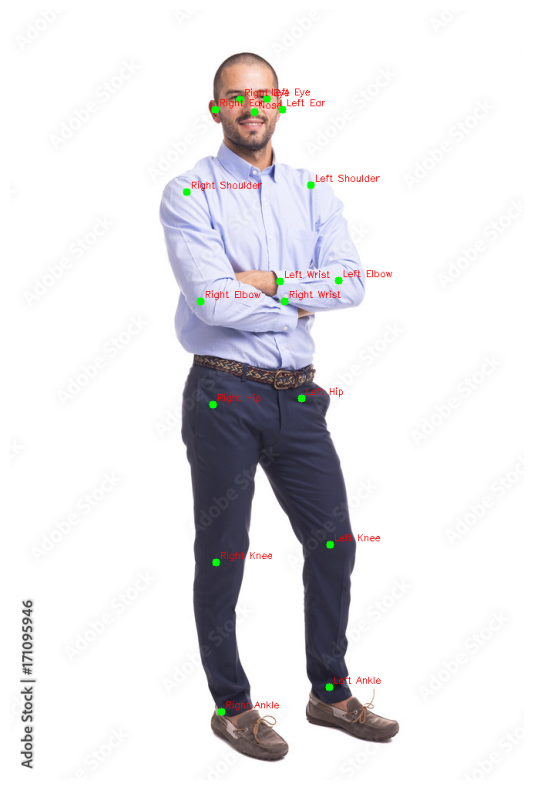

In [35]:
results = model(image_path) # Perform pose estimation on the uploaded image using the loaded YOLOv8 model.

img = cv2.imread(image_path) # Read the image from the specified path using OpenCV.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert the image from BGR (OpenCV default) to RGB (Matplotlib default).

for result in results: # Iterate through each detection result obtained from the model.
    if result.keypoints is not None: # Check if keypoints were detected for the current result.
        keypoints = result.keypoints.xy.cpu().numpy() # Extract the keypoint coordinates (x, y) and convert them to a NumPy array on the CPU.
        for person in keypoints: # Iterate through each set of keypoints, representing a detected person.
            for i, (x, y) in enumerate(person): # Iterate through each individual keypoint (x, y coordinate) and its index.
                if x > 0 and y > 0: # Check if the keypoint coordinates are valid (i.e., not zero or negative, indicating detection).
                    cv2.circle(img, (int(x), int(y)), 5, (0,255,0), -1) # Draw a green circle at the keypoint location on the image.
                    cv2.putText( # Add text (keypoint name) near the keypoint.
                        img,
                        KEYPOINT_NAMES[i], # Get the name of the keypoint using its index.
                        (int(x)+5, int(y)-5), # Position the text slightly offset from the keypoint.
                        cv2.FONT_HERSHEY_SIMPLEX, # Specify the font type.
                        0.4, # Set the font scale.
                        (255,0,0), # Set the text color to blue (RGB).
                        1 # Set the text thickness.
                    )

plt.figure(figsize=(8,10)) # Create a new figure with a specified size for plotting.
plt.imshow(img) # Display the annotated image.
plt.axis("off") # Turn off the axis labels and ticks.
plt.show() # Show the plot.